In [3]:
# import libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

from fastai.vision import *

There are  10 classes:
 ['c5', 'c7', 'c8', 'c2', 'c6', 'c4', 'c3', 'c1', 'c9', 'c0']
There are 17940 training images and 4484 validation images.


In [ ]:
# create the data bunch

bs = 64  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 224 #image size
PATH = "../input/state-farm-distracted-driver-detection/imgs/train"

classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes)
# output description of data

data  = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.2).normalize(imagenet_stats)
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )


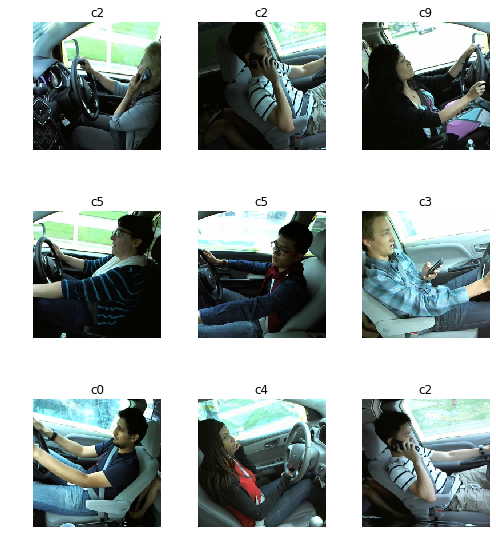

In [4]:
# check if the data are loaded properly

data.show_batch(rows=3, figsize=(7,8))

In [5]:
# define learner (transfer from resnet 34)

learn = cnn_learner(data, models.resnet34, metrics=accuracy, model_dir='/')

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:03<00:00, 26.2MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


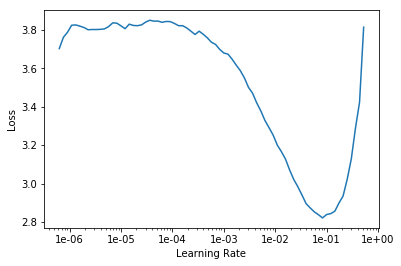

In [6]:
# find optimal learning rate

learn.lr_find();
learn.recorder.plot()

In [7]:
# train the model

learn.fit_one_cycle(10, max_lr=slice(1e-03,1e-01))

epoch,train_loss,valid_loss,accuracy,time
0,0.707445,0.302368,0.912355,08:40
1,1.067339,1.917902,0.799063,07:54
2,1.921938,0.755090,0.937110,07:52
3,1.849660,1.255218,0.925290,07:54
4,1.511191,0.706120,0.931088,07:52
5,0.643090,1.625306,0.969447,08:03
6,0.439409,1.352808,0.972792,07:57
7,0.200111,0.185357,0.973238,08:00
8,0.131159,0.106823,0.983720,08:03
9,0.094593,0.869426,0.982828,07:59


In [11]:
# save the model

learn.export(file = Path("/kaggle/working/fastai_model.pkl"))